# Polinomial Models

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Sample dataset
data = {
    'Study_Hours': [1,2,3,4,5,6,7,8,9,10],
    'Exam_Score': [50,65,75,80,85,88,89,88,85,80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

In [19]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df[['Study_Hours']]
y = df['Exam_Score']


In [20]:
# Fit linear regression for comparison
linear_reg = LinearRegression()
linear_reg.fit(X, y)


# Fit polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)


LinearRegression()

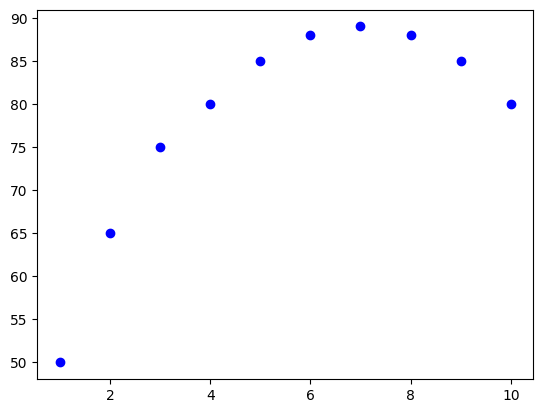

In [21]:
# Plot results
plt.scatter(X, y, color='blue', label='Original Data')

# Evaluate the models
y_pred_linear = linear_reg.predict(X)
y_pred_poly = poly_reg.predict(poly_features.transform(X))

# Exponential regression

R-squared for Linear Regression: 0.8110
R-squared for Exponential Regression: 0.7520


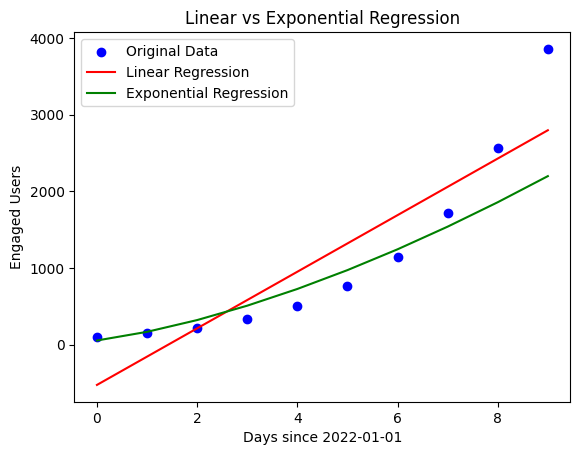

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Sample dataset - Using the data provided by the user
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100,150,225,338,507,761,1142,1713,2570,3855]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the features (Date) and target (Engaged_Users)
X = df[['Date']]
y = df['Engaged_Users']

# Convert Date to numerical representation (days since the first date)
X['Days'] = (X['Date'] - X['Date'].min()).dt.days
X_numeric = X[['Days']]

# Visualize the data
plt.scatter(X_numeric, y, color='blue', label='Original Data')


# Fit linear regression for comparison
linear_reg = LinearRegression()
linear_reg.fit(X_numeric, y)

# Fit exponential regression
exp_reg = LinearRegression()
# Apply log to the numerical representation of dates
exp_reg.fit(np.log(X_numeric + 1), np.log(y))


# Evaluate the models
y_pred_linear = linear_reg.predict(X_numeric)
y_pred_exp = np.exp(exp_reg.predict(np.log(X_numeric + 1)))

# Calculate R-squared values
r2_linear = r2_score(y, y_pred_linear)
r2_exp = r2_score(y, y_pred_exp)

print(f"R-squared for Linear Regression: {r2_linear:.4f}")
print(f"R-squared for Exponential Regression: {r2_exp:.4f}")

# Plot the linear and exponential regression lines
plt.plot(X_numeric, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X_numeric, y_pred_exp, color='green', label='Exponential Regression')

plt.xlabel('Days since 2022-01-01')
plt.ylabel('Engaged Users')
plt.title('Linear vs Exponential Regression')
plt.legend()
plt.show()

# Power models

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


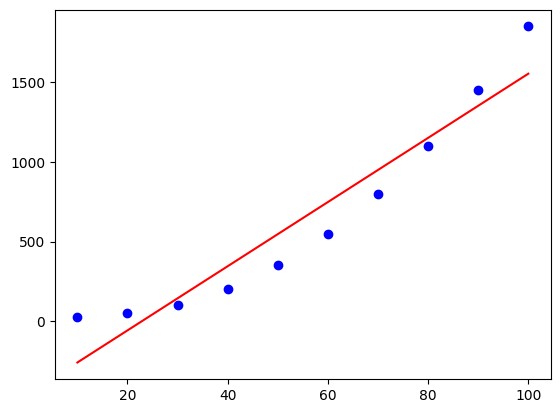

In [32]:
# Import libraries

# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25,50,100,200,350,550,800,1100,1450,1850],
    'Shares': [5,10,20,40,70,110,160,220,290,370],
    'Comments': [2,4,8,16,28,44,64,88,116,148]
}
df = pd.DataFrame(data)

# Perform power regression for Likes as an example
X = df[['Followers']]
y = df['Likes']

# Fit the power regression model
power_reg = LinearRegression()
power_reg.fit(X, y)

# Generate a range of Followers values for the fitted curve
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = power_reg.predict(X_fit)

# Calculate the predicted Likes using the fitted parameters
predicted_likes = power_reg.intercept_ + power_reg.coef_[0] * X_fit

# Create a plot to visualize the relationship
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_fit, predicted_likes, color='red', label='Power Regression')
